# Recommendation_System_Books

### Build a recommender system by using cosine simillarties score.

#### Data Description:

Ratings given by different users on different books.
    
    Features:
    1.)User.ID 2.) Book.Title 3.)Book.Rating

### Project Background

Find a Recommendation system which gives recommendations for a given book.

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance
from scipy.spatial.distance import cosine, correlation
import warnings as warnings
warnings.filterwarnings("ignore")

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# books data
books_data = pd.read_csv("book.csv", encoding='latin1')

#### Exploring the dataset

In [3]:
# Displaying first ten records
books_data.head(10)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [4]:
books_data = books_data.drop('Unnamed: 0',axis=1)
books_data

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [5]:
# Shape of the data
books_data.shape

(10000, 3)

In [6]:
# Summary of the data
books_data.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [7]:
# Check the data types
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
books_data.isnull().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [9]:
# Check for duplicate values
books_data[books_data.duplicated()].shape

(2, 3)

In [10]:
books_data[books_data.duplicated()]

,User.ID,Book.Title,Book.Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [11]:
books_data = books_data.drop_duplicates()
books_data.shape

(9998, 3)

In [12]:
books_data = books_data.rename(columns={"User.ID":"User_ID","Book.Title":"Book_Title","Book.Rating":"Rating"})
books_data

,User_ID,Book_Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [13]:
books_data = books_data.sort_values('User_ID')
books_data

,User_ID,Book_Title,Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


### Step-2.3 : Exploring data using Visualisation

In [14]:
user_counts = pd.DataFrame(books_data.groupby('User_ID').count()['Rating']).rename({'Rating':'no_times_rated'}, axis=1).reset_index()
user_counts

,User_ID,no_times_rated
0,8,7
1,9,1
2,10,1
3,12,1
4,14,3
...,...,...
2177,278846,1
2178,278849,1
2179,278851,14
2180,278852,1


In [15]:
user_counts.sort_values('no_times_rated',ascending=False)

,User_ID,no_times_rated
1031,3757,522
1543,162052,214
630,2276,212
1116,4017,156
1757,277427,150
...,...,...
1049,3800,1
1047,3798,1
193,739,1
1044,3789,1


<AxesSubplot:xlabel='User_ID', ylabel='no_times_rated'>

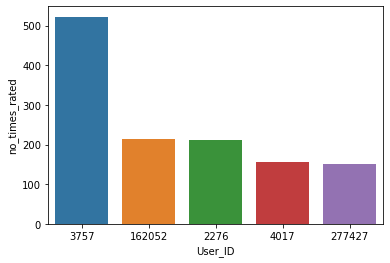

In [16]:
sb.barplot(x=user_counts.User_ID,y=user_counts.no_times_rated, data=user_counts, 
              order=user_counts.sort_values('no_times_rated',ascending=False).User_ID[:5])

#### User ID - 3757 is the person who rated different books more number of times.

In [17]:
book_counts = pd.DataFrame(books_data.groupby('Book_Title').count()['Rating']).rename({'Rating':'no_times_rated'}, axis=1).reset_index()
book_counts

,Book_Title,no_times_rated
0,"Jason, Madison &amp",1
1,Other Stories;Merril;1985;McClelland &amp,1
2,Repairing PC Drives &amp,1
3,'48,1
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1
...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",1
9655,"\Well, there's your problem\: Cartoons",1
9656,iI Paradiso Degli Orchi,1
9657,stardust,1


In [18]:
book_counts.sort_values('no_times_rated',ascending=False)

,Book_Title,no_times_rated
2518,Fahrenheit 451,5
9135,Vanished,4
6471,Stardust,4
2392,Ender's Game (Ender Wiggins Saga (Paperback)),4
8459,"The Subtle Knife (His Dark Materials, Book 2)",4
...,...,...
3255,His-And-Hers Twins (Harlequin American Romance...,1
3256,Histoires Extraordinaires,1
3257,Historia de la vida del BuscÃ³n (Selecciones A...,1
3258,Historical Whodunits,1


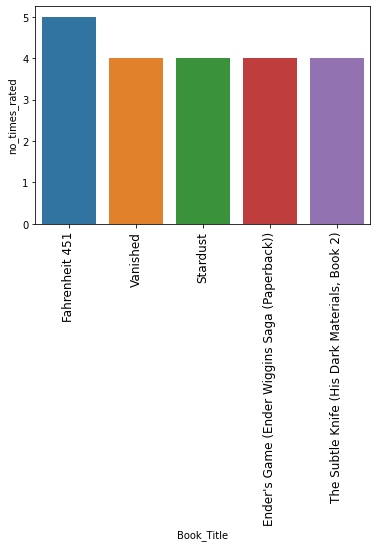

In [19]:
sb.barplot(x=book_counts.Book_Title,y=book_counts.no_times_rated, data=user_counts, 
              order=book_counts.sort_values('no_times_rated',ascending=False).Book_Title[:5])
plt.xticks(rotation = 90,fontsize = 12)
plt.show()

#### 'Fahrenheit 451' is the book which got rated more number of times.

In [20]:
books_data[books_data['Rating']==10]

,User_ID,Book_Title,Rating
2408,12,Apocalypse Wow,10
2419,26,The Jester,10
2428,53,Reliquary,10
2438,70,Void Moon,10
2443,82,Still Life with Woodpecker,10
...,...,...,...
2349,278832,Prize the Epic Quest for Oil Money and Pow,10
2350,278832,DEVIL IN A BLUE DRESS (Easy Rawlins Mysteries ...,10
2351,278832,The Sum of All Fears (Jack Ryan Novels),10
2362,278843,Midnight Masquerade,10


#### These are the books with highest rating.

### Step-3 : Creating Recommendation System

#### Creating a pivot table

In [21]:
books_data_pvt = books_data.pivot_table(index='User_ID',
                                 columns='Book_Title',
                                 values='Rating').reset_index(drop=True)
books_data_pvt

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
books_data_pvt.index = books_data['User_ID'].unique()
books_data_pvt

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
278852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Impute those NaNs with 0 values
books_data_pvt.fillna(0, inplace=True)
books_data_pvt

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Calculating cosine based similarity

In [24]:
user_sim = 1 - pairwise_distances( books_data_pvt.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
#Set the index and column names to user ids 
user_sim_df.index = books_data.User_ID.unique()
user_sim_df.columns = books_data.User_ID.unique()

In [27]:
user_sim_df.iloc[0:5, 0:5]

,8,9,10,12,14
8,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,1.0


In [28]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,8,9,10,12,14
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0


In [29]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[:5]

8     8
9     8
10    8
12    8
14    8
dtype: int64

In [30]:
books_data[(books_data['User_ID']==4049) | (books_data['User_ID']==4207)]

,User_ID,Book_Title,Rating
7991,4049,La rueda de la vida,9
7992,4049,Yo Estoy Bien Tu Estas Bien,6
7989,4049,Fahrenheit 451,8
7988,4049,LA Actitud Mental Positiva: UN Camino Hacia El...,7
7990,4049,Las mujeres en la historia de EspaÃ±a (Documento),9
8191,4207,Fahrenheit 451,8


In [31]:
user_1=books_data[books_data['User_ID']==4049] 

In [32]:
user_2=books_data[books_data['User_ID']==4207] 

In [33]:
user_1.Book_Title

7991                                  La rueda de la vida
7992                          Yo Estoy Bien Tu Estas Bien
7989                                       Fahrenheit 451
7988    LA Actitud Mental Positiva: UN Camino Hacia El...
7990    Las mujeres en la historia de EspaÃ±a (Documento)
Name: Book_Title, dtype: object

In [34]:
user_2.Book_Title

8191    Fahrenheit 451
Name: Book_Title, dtype: object

In [35]:
pd.merge(user_1,user_2,on='Book_Title',how='outer')

,User_ID_x,Book_Title,Rating_x,User_ID_y,Rating_y
0,4049,La rueda de la vida,9,NaN,NaN
1,4049,Yo Estoy Bien Tu Estas Bien,6,NaN,NaN
2,4049,Fahrenheit 451,8,4207.0,8.0
3,4049,LA Actitud Mental Positiva: UN Camino Hacia El...,7,NaN,NaN
4,4049,Las mujeres en la historia de EspaÃ±a (Documento),9,NaN,NaN


In [36]:
#Fetching ratings for Fahrenheit 451
F451_user_rating = books_data_pvt['Fahrenheit 451']  

In [37]:
F451_user_rating

8         0.0
9         0.0
10        0.0
12        0.0
14        0.0
         ... 
278846    0.0
278849    0.0
278851    0.0
278852    0.0
278854    0.0
Name: Fahrenheit 451, Length: 2182, dtype: float64

In [38]:
#Finding the correlation with different books
similar_to_F451 = books_data_pvt.corrwith(F451_user_rating) 


In [39]:
similar_to_F451.head(10) 

Book_Title
 Jason, Madison &amp                                                    -0.000958
 Other Stories;Merril;1985;McClelland &amp                              -0.000958
 Repairing PC Drives &amp                                               -0.000958
'48                                                                     -0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   -0.000958
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR            -0.000958
01-01-00: A Novel of the Millennium                                     -0.000958
1,401 More Things That P*Ss Me Off                                      -0.000958
10 Commandments Of Dating                                               -0.000958
100 Great Fantasy Short, Short Stories                                  -0.000958
dtype: float64

In [40]:
corr_F451 = pd.DataFrame(similar_to_F451, columns=['Correlation'])
corr_F451.dropna(inplace=True)
corr_F451.head()

,Correlation
Book_Title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958


In [41]:
corr_F451[corr_F451['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(5)  

,Correlation
Book_Title,
Fahrenheit 451,1.000000
The Day I Swapped My Dad for 2 Goldfish,0.596326
"For The Love Of Beau (Delta Justice) (Delta Justice , No 9)",0.596326
The Princess Bride: S. Morgenstern's Classic Tale of True Love and High Adventure (The 'Good Parts' Version),0.596326
Les illes grogues: Tres novelÂ¨les romÃ ntiques (El BalancÃ­),0.596326


#### These are the recommended books for persons who liked 'Fahrenheit 451'